In [80]:
from IPython.core.debugger import set_trace

%load_ext nb_black 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns

plt.style.use(style="seaborn")
%matplotlib inline


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [81]:
train = pd.read_csv("C:\\Users\\Asus\\PROJECT Disaster Tweets\\train.csv")
test = pd.read_csv("C:\\Users\\Asus\\PROJECT Disaster Tweets\\test.csv")

<IPython.core.display.Javascript object>

In [82]:
train.head().T

,0,1,2,3,4
id,1,4,5,6,7
keyword,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN
text,Our Deeds are the Reason of this #earthquake M...,Forest fire near La Ronge Sask. Canada,All residents asked to 'shelter in place' are ...,"13,000 people receive #wildfires evacuation or...",Just got sent this photo from Ruby #Alaska as ...
target,1,1,1,1,1


<IPython.core.display.Javascript object>

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<IPython.core.display.Javascript object>

In [84]:
str(train)

"         id keyword location  \\\n0         1     NaN      NaN   \n1         4     NaN      NaN   \n2         5     NaN      NaN   \n3         6     NaN      NaN   \n4         7     NaN      NaN   \n...     ...     ...      ...   \n7608  10869     NaN      NaN   \n7609  10870     NaN      NaN   \n7610  10871     NaN      NaN   \n7611  10872     NaN      NaN   \n7612  10873     NaN      NaN   \n\n                                                   text  target  \n0     Our Deeds are the Reason of this #earthquake M...       1  \n1                Forest fire near La Ronge Sask. Canada       1  \n2     All residents asked to 'shelter in place' are ...       1  \n3     13,000 people receive #wildfires evacuation or...       1  \n4     Just got sent this photo from Ruby #Alaska as ...       1  \n...                                                 ...     ...  \n7608  Two giant cranes holding a bridge collapse int...       1  \n7609  @aria_ahrary @TheTawniest The out of control w...       1 

<IPython.core.display.Javascript object>

In [6]:
test.head().T

,0,1,2,3,4
id,0,2,3,9,11
keyword,NaN,NaN,NaN,NaN,NaN
location,NaN,NaN,NaN,NaN,NaN
text,Just happened a terrible car crash,"Heard about #earthquake is different cities, s...","there is a forest fire at spot pond, geese are...",Apocalypse lighting. #Spokane #wildfires,Typhoon Soudelor kills 28 in China and Taiwan


<IPython.core.display.Javascript object>

handling missing values

In [7]:
train.fillna(-99, inplace=True)
test.fillna(-99, inplace=True)

<IPython.core.display.Javascript object>

In [8]:
train.keyword.value_counts()[:5]

-99           61
fatalities    45
deluge        42
armageddon    42
sinking       41
Name: keyword, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
train.location.value_counts()[:5]

-99              2533
USA               104
New York           71
United States      50
London             45
Name: location, dtype: int64

<IPython.core.display.Javascript object>

plotting distribution of target value

In [10]:
disasters= train[train.target ==1].shape[0]
non_disasters= train[train.target ==0].shape[0]


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

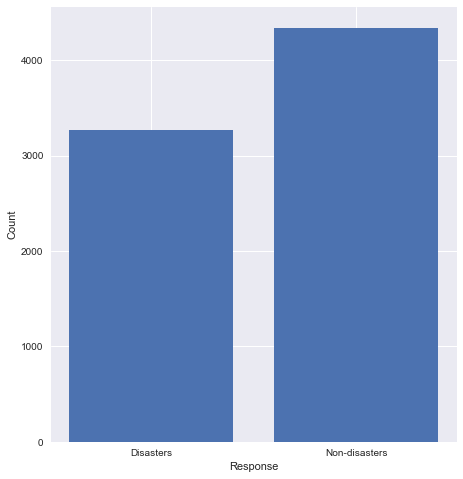

<IPython.core.display.Javascript object>

In [90]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
_ = plt.bar(["Disasters", "Non-disasters"], [disasters, non_disasters])
plt.xlabel("Response")
plt.ylabel("Count")


In [12]:
def plot_target_based_features(feature):
    x1 = train[train.target == 1][feature]
    x2 = train[train.target == 0][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)
    return _

<IPython.core.display.Javascript object>

chech no of features in text feature

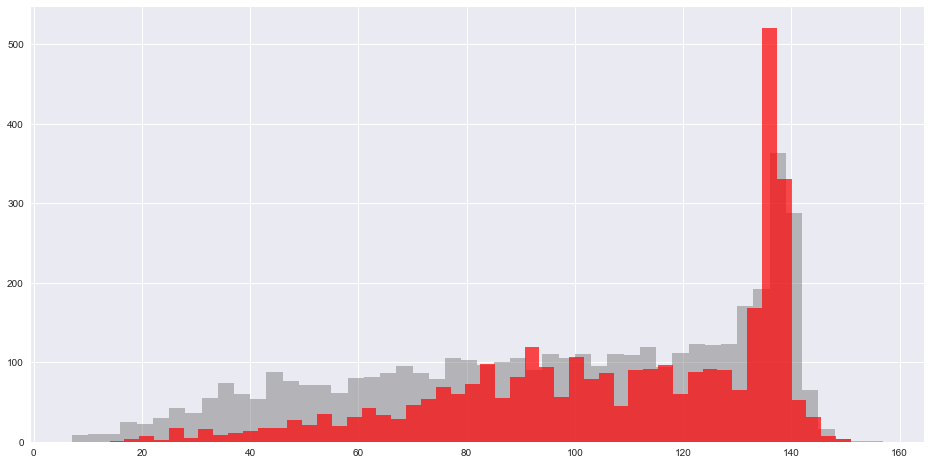

<IPython.core.display.Javascript object>

In [13]:
train["text_len"] = train.text.map(lambda x: len(x))
_ = plot_target_based_features("text_len")

check no. of words in text feature

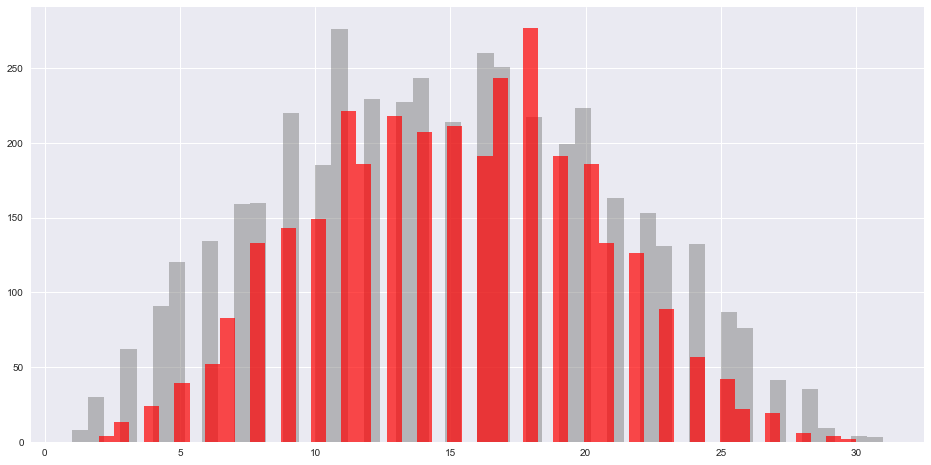

<IPython.core.display.Javascript object>

In [14]:
train["words_count"] = train.text.str.split().map(lambda x: len(x))
_ = plot_target_based_features("words_count")

count no. of unique words

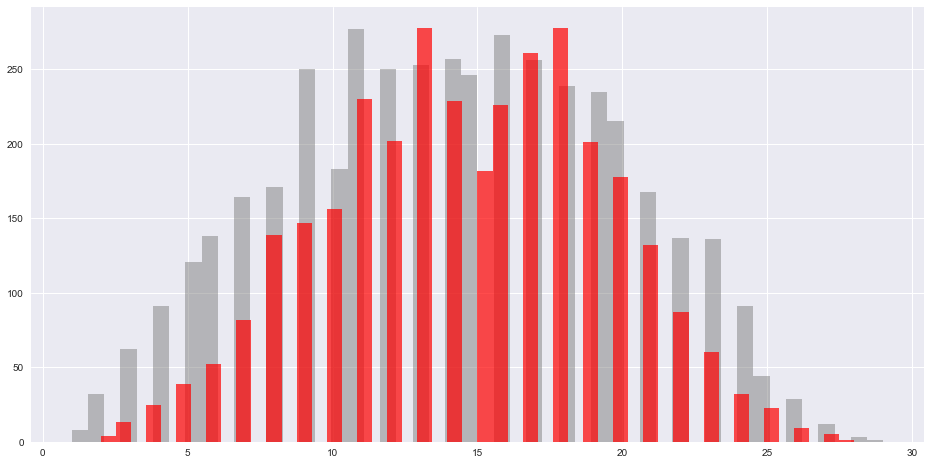

<IPython.core.display.Javascript object>

In [15]:
train["unique_word_count"] = train.text.map(lambda x: len(set(str(x).split())))
_ = plot_target_based_features("unique_word_count")

mean word length

In [16]:
train["mean_word_length"]= train.text.map(
    lambda x: np.mean([len(w) for w in str(x).split()])
)


<IPython.core.display.Javascript object>

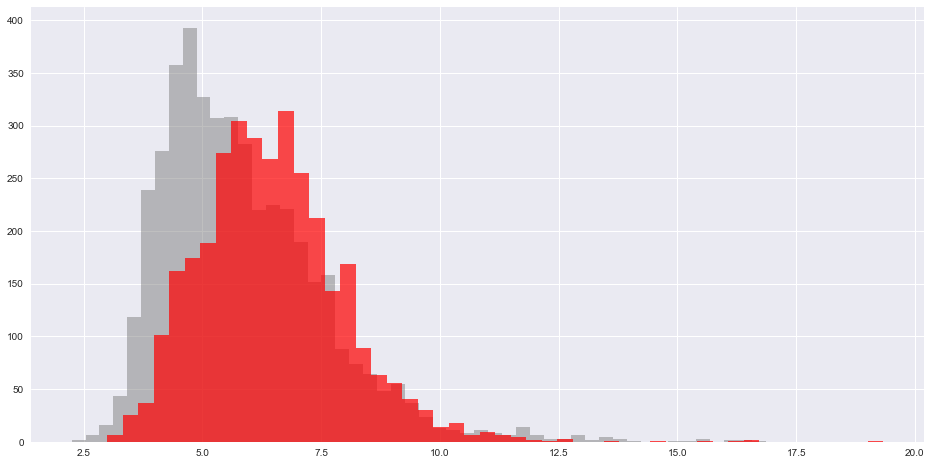

<IPython.core.display.Javascript object>

In [17]:
_ = plot_target_based_features("mean_word_length")

punctutaion count

In [18]:
import string
train["punctuation_count"]= train["text"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)


<IPython.core.display.Javascript object>

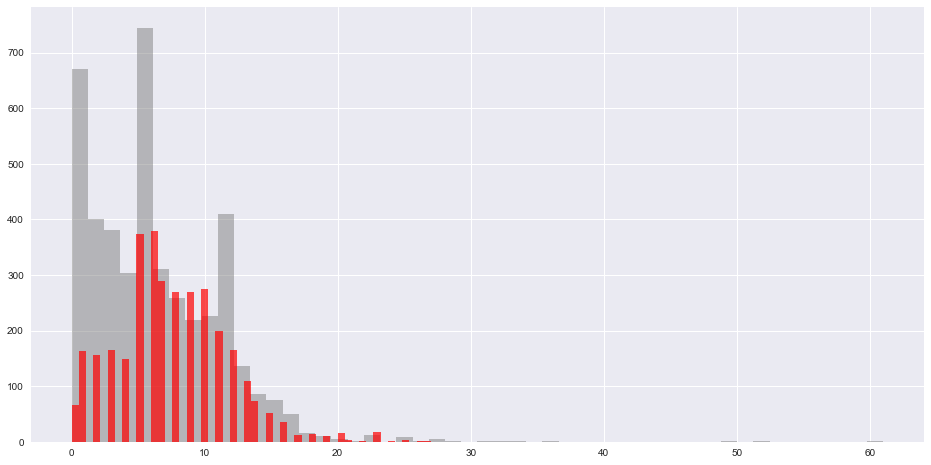

<IPython.core.display.Javascript object>

In [19]:
_ = plot_target_based_features("punctuation_count")

n gram analysis

In [20]:
from nltk.corpus import stopwords

stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

<IPython.core.display.Javascript object>

In [21]:
from nltk.corpus import stopwords


def generate_ngrams(text, n_gram=1, stop=True):
    """
    Simple n-gram generator.
    """
    stop = set(stopwords.words("english")) if stop else {}

    token = [
        token for token in text.lower().split(" ") if token != "" if token not in stop
    ]
    z = zip(*[token[i:] for i in range(n_gram)])
    ngrams = [" ".join(ngram) for ngram in z]
    return ngrams

<IPython.core.display.Javascript object>

create unigram

In [22]:
from collections import defaultdict

<IPython.core.display.Javascript object>

In [23]:
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

<IPython.core.display.Javascript object>

In [24]:
for text in train[train.target == 1].text:
    for word in generate_ngrams(text):
        disaster_unigrams[word] += 1

for text in train[train.target == 0].text:
    for word in generate_ngrams(text):
        nondisaster_unigrams[word] += 1

<IPython.core.display.Javascript object>

In [25]:
disaster_unigrams

defaultdict(int,
            {'deeds': 1,
             'reason': 7,
             '#earthquake': 19,
             'may': 47,
             'allah': 4,
             'forgive': 1,
             'us': 40,
             'forest': 44,
             'fire': 150,
             'near': 47,
             'la': 17,
             'ronge': 1,
             'sask.': 1,
             'canada': 4,
             'residents': 7,
             'asked': 1,
             "'shelter": 1,
             "place'": 1,
             'notified': 1,
             'officers.': 1,
             'evacuation': 38,
             'shelter': 5,
             'place': 12,
             'orders': 9,
             'expected': 9,
             '13,000': 1,
             'people': 93,
             'receive': 2,
             '#wildfires': 5,
             'california': 88,
             'got': 29,
             'sent': 4,
             'photo': 7,
             'ruby': 1,
             '#alaska': 1,
             'smoke': 11,
             'pours': 1,
     

<IPython.core.display.Javascript object>

In [26]:
disaster_unigrams.items()

dict_items([('deeds', 1), ('reason', 7), ('#earthquake', 19), ('may', 47), ('allah', 4), ('forgive', 1), ('us', 40), ('forest', 44), ('fire', 150), ('near', 47), ('la', 17), ('ronge', 1), ('sask.', 1), ('canada', 4), ('residents', 7), ('asked', 1), ("'shelter", 1), ("place'", 1), ('notified', 1), ('officers.', 1), ('evacuation', 38), ('shelter', 5), ('place', 12), ('orders', 9), ('expected', 9), ('13,000', 1), ('people', 93), ('receive', 2), ('#wildfires', 5), ('california', 88), ('got', 29), ('sent', 4), ('photo', 7), ('ruby', 1), ('#alaska', 1), ('smoke', 11), ('pours', 1), ('school', 29), ('#rockyfire', 4), ('update', 8), ('=>', 1), ('hwy.', 4), ('20', 9), ('closed', 15), ('directions', 1), ('due', 23), ('lake', 8), ('county', 26), ('-', 389), ('#cafire', 2), ('#flood', 4), ('#disaster', 6), ('heavy', 18), ('rain', 22), ('causes', 9), ('flash', 17), ('flooding', 31), ('streets', 2), ('manitou,', 1), ('colorado', 9), ('springs', 3), ('areas', 7), ("i'm", 41), ('top', 13), ('hill', 5)

<IPython.core.display.Javascript object>

In [27]:
df_disaster_unigrams = pd.DataFrame(
    sorted(disaster_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_nondisaster_unigrams = pd.DataFrame(
    sorted(nondisaster_unigrams.items(), key=lambda x: x[1], reverse=True)
)

<IPython.core.display.Javascript object>

In [28]:
sorted(disaster_unigrams.items(), key=lambda x: x[1], reverse=True)[:10]

[('-', 389),
 ('fire', 150),
 ('via', 117),
 ('&amp;', 105),
 ('...', 105),
 ('suicide', 103),
 ('disaster', 97),
 ('people', 93),
 ('police', 93),
 ('killed', 92)]

<IPython.core.display.Javascript object>

In [29]:
df_disaster_unigrams.head()

,0,1
0,-,389
1,fire,150
2,via,117
3,&amp;,105
4,...,105


<IPython.core.display.Javascript object>

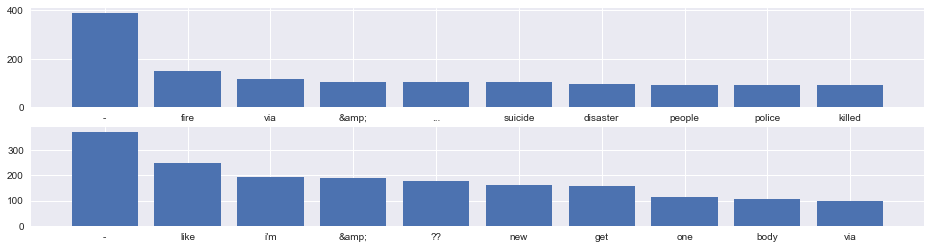

<IPython.core.display.Javascript object>

In [30]:
dl = df_disaster_unigrams[0][:10]
d2 = df_disaster_unigrams[1][:10]

nd1 = df_nondisaster_unigrams[0][:10]
nd2 = df_nondisaster_unigrams[1][:10]

plt.figure(1, figsize=(16, 4))
plt.subplot(2, 1, 1)
_ = plt.bar(dl, d2)

plt.subplot(2, 1, 2)
_ = plt.bar(nd1, nd2)

create bigrams

In [31]:
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for text in train[train.target == 1].text:
    for word in generate_ngrams(text, n_gram=2):
        disaster_bigrams[word] += 1

for text in train[train.target == 0].text:
    for word in generate_ngrams(text, n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(
    sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1]
)
df_nondisaster_bigrams = pd.DataFrame(
    sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1]
)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


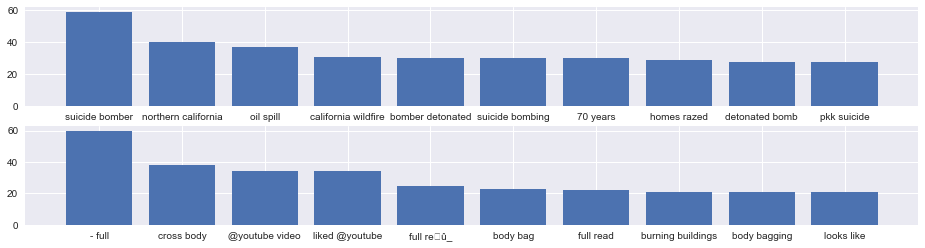

<IPython.core.display.Javascript object>

In [32]:
d1 = df_disaster_bigrams[0][:10]
d2 = df_disaster_bigrams[1][:10]

nd1 = df_nondisaster_bigrams[0][:10]
nd2 = df_nondisaster_bigrams[1][:10]

plt.figure(1, figsize=(16, 4))
plt.subplot(2, 1, 1)
_ = plt.bar(d1, d2)

plt.subplot(2, 1, 2)
_ = plt.bar(nd1, nd2)

check common bigrams in whole corpus

In [33]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_text_ngrams(corpus, ngrams=(1, 1), nr=None):
    """
    Creates a bag of ngrams and counts ngram frequency.
    Returns a sorted list of tuples: (ngram, count)
    """
    vec = CountVectorizer(ngram_range=ngrams).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:nr]

<IPython.core.display.Javascript object>

In [34]:
top_text_bigrams = get_top_text_ngrams(train.text, ngrams=(2, 2), nr=10)

<IPython.core.display.Javascript object>

In [35]:
top_text_bigrams

[('http co', 4306),
 ('https co', 410),
 ('in the', 308),
 ('of the', 256),
 ('û_ http', 217),
 ('on the', 129),
 ('to the', 126),
 ('to be', 108),
 ('for the', 97),
 ('at the', 85)]

<IPython.core.display.Javascript object>

<BarContainer object of 10 artists>

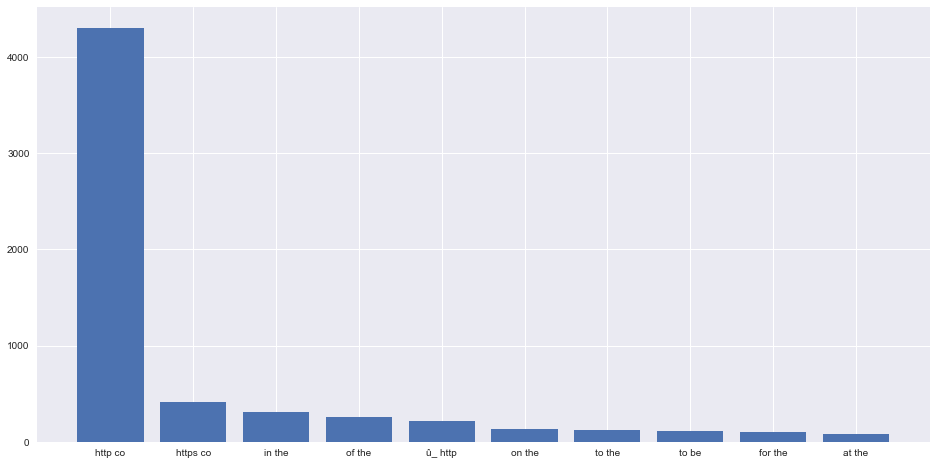

<IPython.core.display.Javascript object>

In [36]:
x, y = zip(*top_text_bigrams)
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.bar(x, y)

# cleaning the data

remove urls and html

In [37]:
import re


def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

<IPython.core.display.Javascript object>

In [38]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002782-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

<IPython.core.display.Javascript object>

removing punctuation

In [39]:
import string

<IPython.core.display.Javascript object>

In [40]:
def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

<IPython.core.display.Javascript object>

remove stopwords

In [41]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

<IPython.core.display.Javascript object>

In [42]:
train["text"] = train["text"].map(remove_stopwords)

<IPython.core.display.Javascript object>

stemming. bundling together words of same root

In [43]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()


def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

<IPython.core.display.Javascript object>

### Tokenization

In [44]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
train["tokens"] = train["text"].map(tokenizer.tokenize)

<IPython.core.display.Javascript object>

In [45]:
train[["text", "tokens"]].head(10)

,text,tokens
0,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for..."
1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask., canada]"
2,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie..."
3,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #, wildfires, evacua..."
4,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ..."
5,#rockyfire update => california hwy. 20 closed...,"[#, rockyfire, update, =, >, california, hwy.,..."
6,#flood #disaster heavy rain causes flash flood...,"[#, flood, #, disaster, heavy, rain, causes, f..."
7,i'm top hill see fire woods...,"[i, 'm, top, hill, see, fire, woods, ...]"
8,there's emergency evacuation happening buildin...,"[there, 's, emergency, evacuation, happening, ..."
9,i'm afraid tornado coming area...,"[i, 'm, afraid, tornado, coming, area, ...]"


<IPython.core.display.Javascript object>

## Bag of words

In [46]:
from sklearn.feature_extraction.text import CountVectorizer


def count_vect(data, ngrams=(1, 1)):
    count_vectorizer = CountVectorizer(ngram_range=ngrams)
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

<IPython.core.display.Javascript object>

In [47]:
train_counts, count_vectorizer = count_vect(train["text"])
test_counts = count_vectorizer.transform(test["text"])

<IPython.core.display.Javascript object>

Test to see if CountVectorizer worked as expected

In [48]:
train.shape

(7613, 11)

<IPython.core.display.Javascript object>

In [49]:
train_counts.todense().shape

(7613, 21620)

<IPython.core.display.Javascript object>

In [50]:
len(train_counts.todense()[0].tolist()[0])

21620

<IPython.core.display.Javascript object>

In [51]:
train.text.iloc[0]

'deeds reason #earthquake may allah forgive us'

<IPython.core.display.Javascript object>

In [52]:
print(train_counts.todense()[0][0:].sum())

7


<IPython.core.display.Javascript object>

In [53]:
train_counts, count_vectorizer = count_vect(train["text"], ngrams=(1, 2))
test_counts = count_vectorizer.transform(test["text"])

print(train_counts.todense()[0][0:].sum())

13


<IPython.core.display.Javascript object>

### TF IDF
Downweighting frequently occuring words in the feature vectors.Frequently occuring words typically don't contain useful information therefore TF-IDF is great for assessing word relevancy.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer


def tfidf(data, ngrams=(1, 2)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams)
    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer


train_tfidf, tfidf_vectorizer = tfidf(train["text"])
test_tfidf = tfidf_vectorizer.transform(test["text"])

<IPython.core.display.Javascript object>

Test to see if TfidfVectorizer worked as expected

In [55]:
[x for x in train_tfidf.todense()[0][0:].tolist()[0] if x != 0]

[0.2608512592753616,
 0.3158368744753251,
 0.30198436843007553,
 0.3158368744753251,
 0.20946523168699432,
 0.3158368744753251,
 0.30198436843007553,
 0.3158368744753251,
 0.1869424451961099,
 0.2921558589774568,
 0.2355033530128126,
 0.3158368744753251,
 0.1765299132549601]

<IPython.core.display.Javascript object>

In [56]:
print(train_tfidf.todense()[0][0:].sum())

3.544601170640472


<IPython.core.display.Javascript object>

In [57]:
train_tfidf, tfidf_vectorizer = tfidf(train["text"], ngrams=(1, 2))
test_tfidf = tfidf_vectorizer.transform(test["text"])

print(train_tfidf.todense()[0][0].sum())

3.544601170640472


<IPython.core.display.Javascript object>

## Visualizing the embeddings

In [58]:
X_counts = train_counts
X_tfidf = train_tfidf
y = train["target"].values

<IPython.core.display.Javascript object>

In [59]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label: idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ["orange", "blue", "blue"]
    if plot:
        plt.scatter(
            lsa_scores[:, 0],
            lsa_scores[:, 1],
            s=8,
            alpha=0.8,
            c=test_labels,
            cmap=matplotlib.colors.ListedColormap(colors),
        )
        red_patch = mpatches.Patch(color="orange", label="Irrelevant")
        green_patch = mpatches.Patch(color="blue", label="Disaster")
        plt.legend(handles=[red_patch, green_patch], prop={"size": 16})

<IPython.core.display.Javascript object>

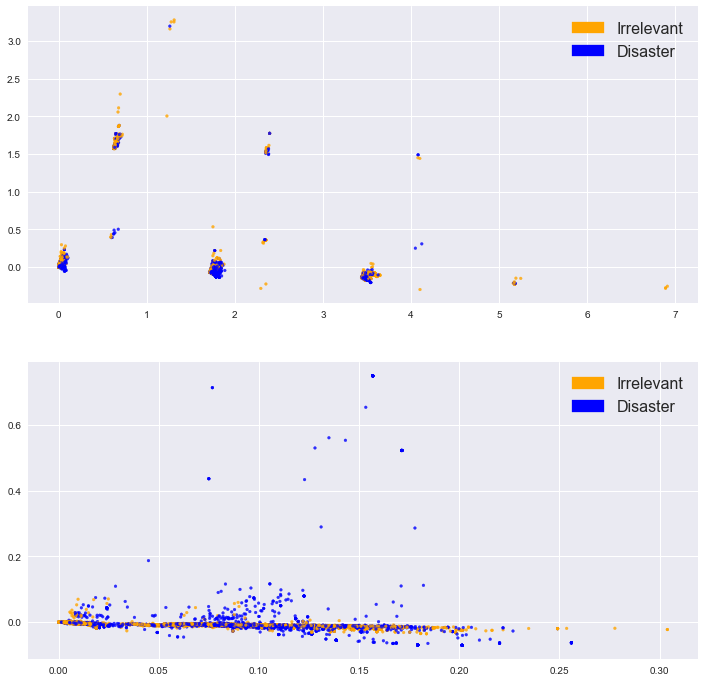

<IPython.core.display.Javascript object>

In [60]:
plt.figure(1, figsize=(12, 12))
plt.subplot(2, 1, 1)
plot_LSA(X_counts, y)
plt.subplot(2, 1, 2)
plot_LSA(X_tfidf, y)

## Basic Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

<IPython.core.display.Javascript object>

With CountVectorizer

In [62]:
X = train_counts
y = train["target"].values

X_train_counts, X_test, y_train_counts, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

<IPython.core.display.Javascript object>

In [63]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_counts, y_train_counts)

LogisticRegression(class_weight='balanced')

<IPython.core.display.Javascript object>

In [64]:
y_pred = model.predict(X_test)
f1score = f1_score(y_test, y_pred)
print(f"Counts Model Score: {f1score * 100} %")

Counts Model Score: 76.43312101910828 %


<IPython.core.display.Javascript object>

With Tfid Vectorizer

In [65]:
X = train_tfidf
y = train["target"].values

X_train_tfidf, X_test, y_train_tfidf, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

<IPython.core.display.Javascript object>

In [66]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(class_weight='balanced')

<IPython.core.display.Javascript object>

In [67]:
y_pred = model.predict(X_test)

f1score = f1_score(y_test, y_pred)
print(f"Tfidf Model Score: {f1score * 100} %")

Tfidf Model Score: 74.78122513922035 %


<IPython.core.display.Javascript object>

Tf idf is better

##  or Basic NLP

# Lime
(for tfidf vectorizer)

In [68]:
# pip install lime

<IPython.core.display.Javascript object>

In [69]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(tfidf_vectorizer, model)

<IPython.core.display.Javascript object>

In [70]:
test.text.iloc[1]

'Heard about #earthquake is different cities, stay safe everyone.'

<IPython.core.display.Javascript object>

In [71]:
print(pipe.predict_proba([test.text.iloc[1]]))




[[0.51585143 0.48414857]]


<IPython.core.display.Javascript object>

In [72]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=["irrelevant", "disaster"])

<IPython.core.display.Javascript object>

In [73]:
max_features = test.text.str.split().map(lambda x: len(x)).max()
print(max_features)

31


<IPython.core.display.Javascript object>

In [74]:
import random

random.seed(13)
idx = random.randint(0, len(test))

exp = explainer.explain_instance(
    test.text.iloc[idx], pipe.predict_proba, num_features=max_features
)

<IPython.core.display.Javascript object>

In [75]:
print(
    f"Probability of the sample to be a disaster is: {pipe.predict_proba([test.text.iloc[1]])[0, 1]}\n"
)
print(f"Explanation as a list of weighted features:")
exp.as_list()

Probability of the sample to be a disaster is: 0.48414856634449815

Explanation as a list of weighted features:


[('train', 0.09276380439637019),
 ('derailed', 0.06001932794874668),
 ('car', 0.04101624146225482),
 ('Also', -0.03439832101368994),
 ('damage', 0.032298047570017814),
 ('that', -0.03210784907179859),
 ('yet', -0.02576256869289595),
 ('Metro', 0.025697353437271662),
 ('available', -0.022444291475768856),
 ('no', 0.009471474110148552),
 ('WMATA', 0.009244396461588068),
 ('service', 0.008563168194103977),
 ('is', -0.008151382871998446),
 ('estimate', 0.007127229283129555),
 ('six', 0.00638651504302846),
 ('there', 0.005820655127108757),
 ('the', 0.005000837930878265),
 ('CQnow', -0.004339620002774516),
 ('of', 0.003350145181331555),
 ('on', 0.0030681230692686566),
 ('m', 0.000924220500978463),
 ('a', -0.0005893728442286776),
 ('from', -0.00033662517412867807),
 ('Shuttle', -0.00010850763126786163),
 ('5', -4.373275289806521e-05)]

<IPython.core.display.Javascript object>

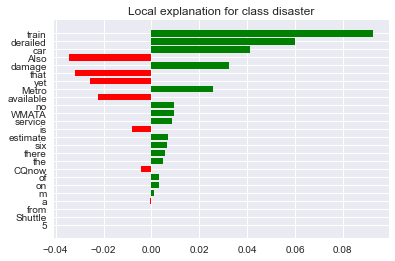

<IPython.core.display.Javascript object>

In [76]:
f = exp.as_pyplot_figure()

In [77]:
exp.show_in_notebook(text=True)

<IPython.core.display.Javascript object>